In [2]:
%autosave 10
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy

Autosaving every 10 seconds


In [3]:
from scipy import integrate

integrate.quad(lambda x: np.exp(-x**2), 0, np.inf)

(0.8862269254527579, 7.101318390472462e-09)

In [4]:
value, err = integrate.quad(lambda x: np.exp(-x**2), 0, np.inf)
value - np.sqrt(np.pi) / 2

0.0

In [5]:
value = integrate.quad(lambda x: np.exp(-x**2), 0, np.inf)[0]

In [6]:
value, _ = integrate.quad(lambda x: np.exp(-x**2), 0, np.inf)
_

7.101318390472462e-09

In [12]:
x, dx = np.linspace(0, np.pi, 129, retstep=True)
y = np.sin(x)
print(integrate.trapz(y, x))
print(integrate.trapz(x=x, y=y))
print(integrate.simps(x=x, y=y))
print(integrate.romb(y, dx))

1.9998996001842024
1.9998996001842024
2.000000004032257
2.0


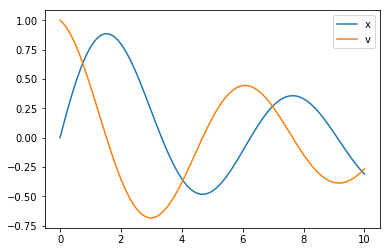

In [19]:
from functools import partial

def dydt(t, y, omega, delta, omega0, f):
    x, v = y
    dxdt = v
    dvdt = f * np.sin(omega0 * t) - 2 * delta * v - omega**2 * x
    return [dxdt, dvdt]

omega = 1
omega0 = 0.5
delta = 0.1
f = 0.1
t = np.linspace(0, 10, 101)
result = integrate.solve_ivp(
    partial(dydt, omega=omega, delta=delta, omega0=omega0, f=f),
    [t[0], t[-1]],
    y0=[0, 1],
    t_eval=t,
)

plt.plot(result.t, result.y[0], label='x')
plt.plot(result.t, result.y[1], label='v')
plt.legend()

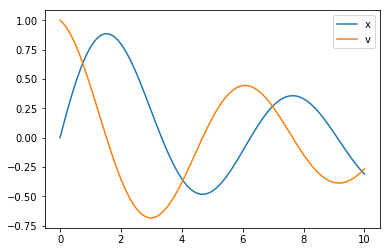

In [21]:
from functools import partial

def dydt(t, y, omega, delta, omega0, f):
    x, v = y
    dxdt = v
    dvdt = f * np.sin(omega0 * t) - 2 * delta * v - omega**2 * x
    return [dxdt, dvdt]

omega = 1
omega0 = 0.5
delta = 0.1
f = 0.1
t = np.linspace(0, 10, 101)
result = integrate.solve_ivp(
    partial(dydt, omega=omega, delta=delta, omega0=omega0, f=f),
    [t[0], t[-1]],
    y0=[0, 1],
    t_eval=t,
    vectorized=True,
)

plt.plot(result.t, result.y[0], label='x')
plt.plot(result.t, result.y[1], label='v')
plt.legend()

In [22]:
?integrate.solve_bvp()

In [23]:
from scipy import interpolate

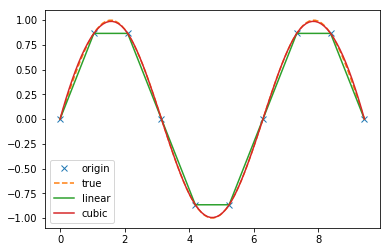

In [31]:
x = np.linspace(0, 3 * np.pi, 10)
y = np.sin(x)
x_ = np.linspace(0, 3 * np.pi, 100)
y_ = np.sin(x_)

plt.plot(x, y, 'x', label='origin')
plt.plot(x_, y_, '--', label='true')

linear_spline = interpolate.interp1d(x, y, kind='linear')
plt.plot(x_, linear_spline(x_), label='linear')

linear_spline = interpolate.interp1d(x, y, kind='cubic')
plt.plot(x_, linear_spline(x_), label='cubic')

plt.legend()

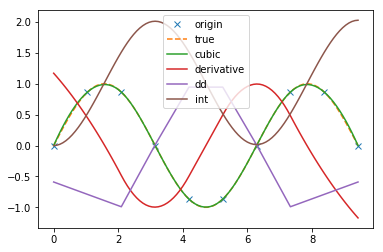

In [38]:
x = np.linspace(0, 3 * np.pi, 10)
y = np.sin(x)
x_ = np.linspace(0, 3 * np.pi, 100)
y_ = np.sin(x_)

plt.plot(x, y, 'x', label='origin')
plt.plot(x_, y_, '--', label='true')

spline = interpolate.CubicSpline(x, y)
plt.plot(x_, spline(x_), label='cubic')
d_spline = spline.derivative()
plt.plot(x_, d_spline(x_), label='derivative')
d2_spline = spline.derivative(2)
plt.plot(x_, d2_spline(x_), label='dd')
int_spline = spline.derivative(-1)
plt.plot(x_, int_spline(x_), label='int')
plt.legend()